<a href="https://colab.research.google.com/github/BrainConnection/QuTiP/blob/main/Project%20Dynamic%20Decoupling/Dynamic%20Decoupling%20Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Environment Setting



In [3]:
!pip install qutip
!pip install numpy
!pip install matplotlib
!pip install scipy

In [4]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

/usr/local/lib/python3.10/dist-packages/qutip/__init__.py:65: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


#0. Time-Independent Dispersive Qubit-Resonator Hamiltonian (Rotating Frame, Dispersive Limit)

1) Hamiltonian

$H =\chi\sigma_z a^\dagger a$

In [34]:
# initial constant
N = 100
chi = 1
alpha_0 = 1

T = 0.1
T_end = 10

In [35]:
# operator
sz = sigmaz()
sx = sigmax()
sy = sigmay()
sm = sigmam()
a = destroy(N)

H0 = chi*tensor(sz, a.dag()*a)

2) Ramsey Sequence : $\pi/2$ pulse -> free evolution -> $\pi/2$ pulse

In [36]:
def Hp_coeff(t, args):
  args["T"] = T
  args["T_end"] = T_end
  return (np.pi/(2*T))*(t>0)*(t<T) + (np.pi/(2*T))*(t<T_end)*(t>T_end-T)

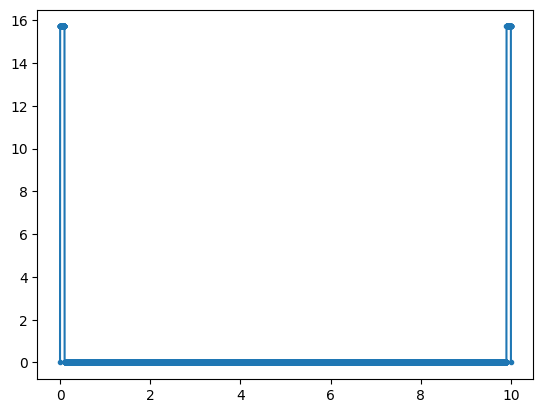

In [37]:
# pulse shape example
args = {
    "T" : T,
    "T_end" : T_end
}
t = np.linspace(0, T_end, 10000)
plt.figure()
plt.plot(t, Hp_coeff(t, args), '.-')

In [38]:
psi = tensor(basis(2,0), coherent(N, alpha_0))
tlist = np.linspace(0,T_end,10000)
Hp = tensor(0.5*sx, qeye(N))

H=[H0,[Hp,Hp_coeff]]

3) Plot $X$, $Y$, $Z$

Include $\frac{\pi}{2}$ pulse, Initial State : $|0\rangle$

$\alpha(0)=1$

In [39]:
sx_composite = tensor(sx, qeye(N))
sy_composite = tensor(sy, qeye(N))
sz_composite = tensor(sz, qeye(N))
sm_composite = tensor(sm, qeye(N))

annihilate_composite = tensor(qeye(2), a)
create_composite = tensor(qeye(2), a.dag())

op_list = [sx_composite, sy_composite, sz_composite, sm_composite, annihilate_composite, create_composite]

res = sesolve(H, psi, tlist, op_list, args = args)

Text(0, 0.5, 'Expectation Value')

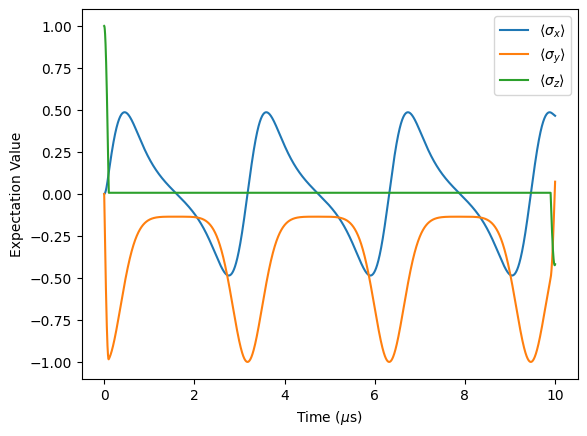

In [40]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res.expect[0], label = r'$\langle\sigma_x\rangle$')
ax.plot(tlist, res.expect[1], label = r'$\langle\sigma_y\rangle$')
ax.plot(tlist, res.expect[2], label = r'$\langle\sigma_z\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

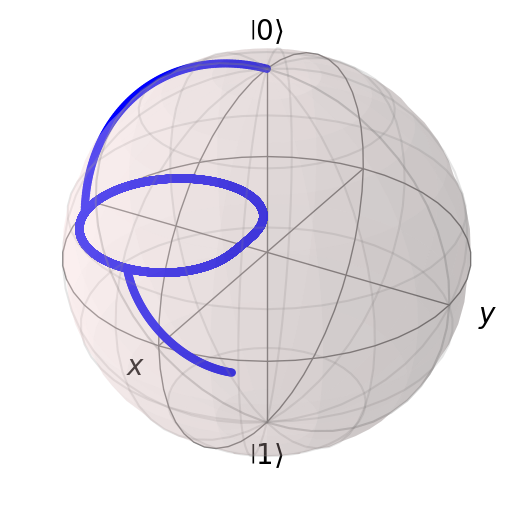

In [41]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res.expect, meth="s")
sphere.show()

4) Plot $\alpha$

Include $\frac{\pi}{2}$ pulse, Initial State : $|0\rangle$

$\alpha(0)=1$

Text(0, 0.5, 'Expectation Value')

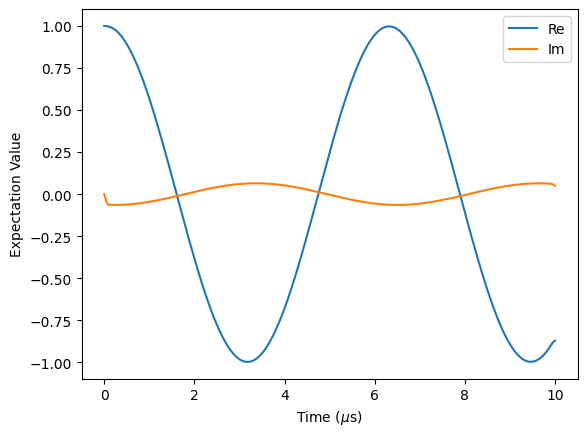

In [42]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res.expect[4].real, label = 'Re')
ax.plot(tlist, res.expect[4].imag, label = 'Im')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

Text(0, 0.5, 'Im[$\\alpha$]')

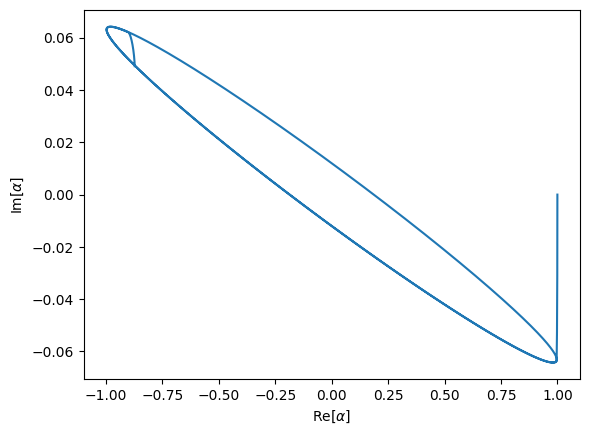

In [43]:
fig, ax = plt.subplots(1, 1)
ax.plot(res.expect[4].real, res.expect[4].imag, label=r'qubit in $|+\rangle$')
ax.set_xlabel(r'Re[$\alpha$]')
ax.set_ylabel(r'Im[$\alpha$]')

5) Plot $X$, $Y$, $Z$

Not Include $\frac{\pi}{2}$ pulse, Initial State : $|+\rangle$

$\alpha(0)=1$

Text(0, 0.5, 'Expectation Value')

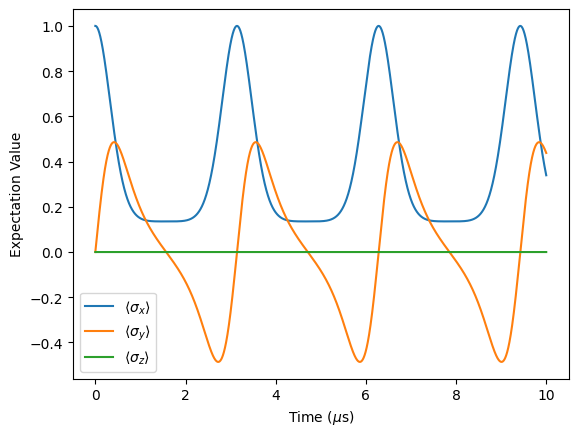

In [44]:
#plot X, Y, Z
psi_plus = tensor((basis(2,0)+basis(2,1))/np.sqrt(2), coherent(N, alpha_0))
res = sesolve(H0, psi_plus, tlist, op_list, args = args)

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res.expect[0], label = r'$\langle\sigma_x\rangle$')
ax.plot(tlist, res.expect[1], label = r'$\langle\sigma_y\rangle$')
ax.plot(tlist, res.expect[2], label = r'$\langle\sigma_z\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

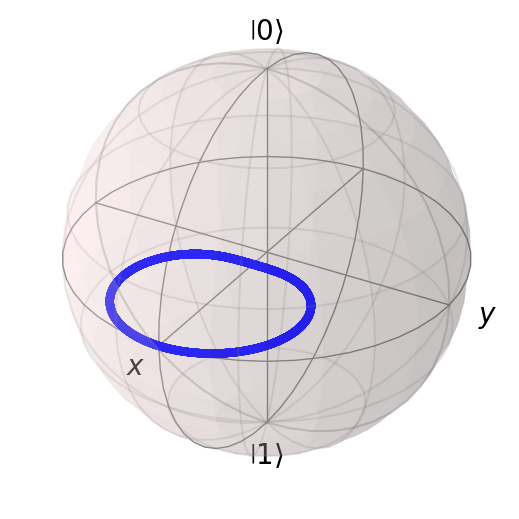

In [45]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res.expect, meth="s")
sphere.show()

6) Plot $X$, $Y$, $Z$

Not Include $\frac{\pi}{2}$ pulse, Initial State : $|0\rangle$

$\alpha(0)=1$

In [46]:
tlist = np.linspace(0,2,10000)
res = sesolve(H0, psi_plus, tlist, op_list, args = args)

psi_0 = tensor(basis(2,0), coherent(N, alpha_0))
res_0 = sesolve(H0, psi_0, tlist, op_list, args = args)

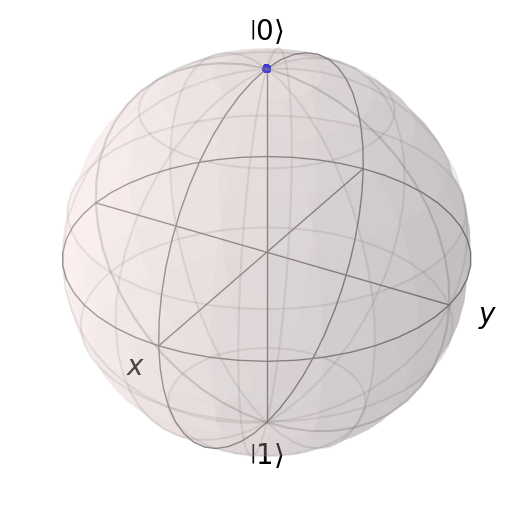

In [47]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res_0.expect, meth="s")
sphere.show()

7) Plot $X$, $Y$, $Z$

Not Include $\frac{\pi}{2}$ pulse, Initial State : $|1\rangle$

$\alpha(0)=1$

In [48]:
tlist = np.linspace(0,2,10000)

psi_1 = tensor(basis(2,1), coherent(N, alpha_0))
res_1 = sesolve(H0, psi_1, tlist, op_list, args = args)

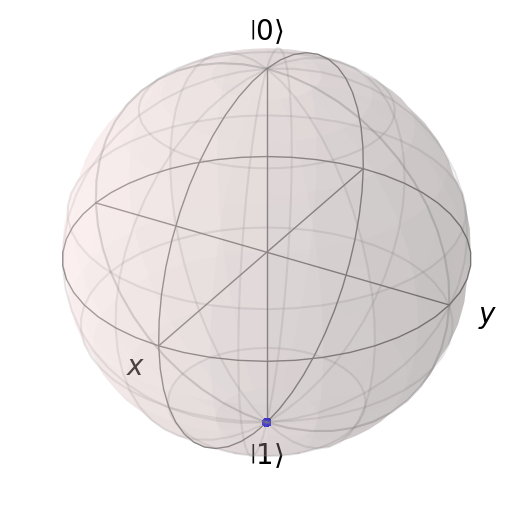

In [49]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res_1.expect, meth="s")
sphere.show()

8) Plot $\alpha$

Not Include $\frac{\pi}{2}$ pulse, Initial State : $|0\rangle$, $|1\rangle$, $|+\rangle$

$\alpha(0)=1$

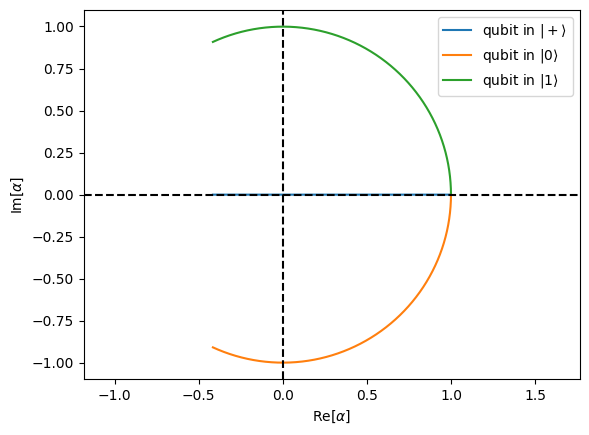

In [50]:
#plot alpha
plt.figure()
plt.plot(res.expect[4].real, res.expect[4].imag, label=r'qubit in $|+\rangle$')
plt.plot(res_0.expect[4].real, res_0.expect[4].imag, label=r'qubit in $|0\rangle$')
plt.plot(res_1.expect[4].real, res_1.expect[4].imag, label=r'qubit in $|1\rangle$')
plt.xlabel(r'Re[$\alpha$]')
plt.ylabel(r'Im[$\alpha$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

9) Plot $X$, $Y$, $Z$

Not Include $\frac{\pi}{2}$ pulse, Initial State : $|+\rangle$

$\alpha(0)=2$

Text(0, 0.5, 'Expectation Value')

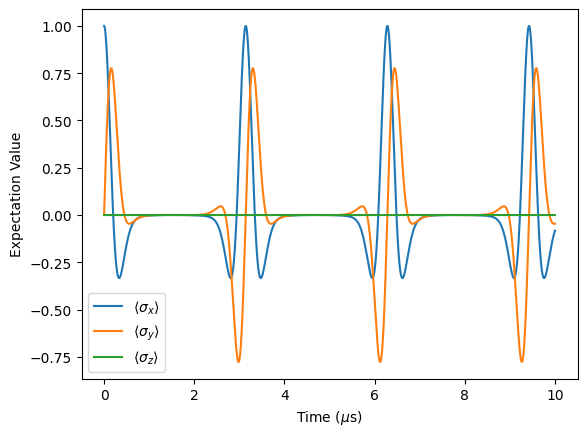

In [51]:
#plot X, Y, Z
tlist = np.linspace(0,10,10000)
alpha_0 = 2
H0 = chi*tensor(sz, a.dag()*a)
psi_plus = tensor((basis(2,0)+basis(2,1))/np.sqrt(2), coherent(N, alpha_0))

res = sesolve(H0, psi_plus, tlist, op_list)

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res.expect[0], label = r'$\langle\sigma_x\rangle$')
ax.plot(tlist, res.expect[1], label = r'$\langle\sigma_y\rangle$')
ax.plot(tlist, res.expect[2], label = r'$\langle\sigma_z\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

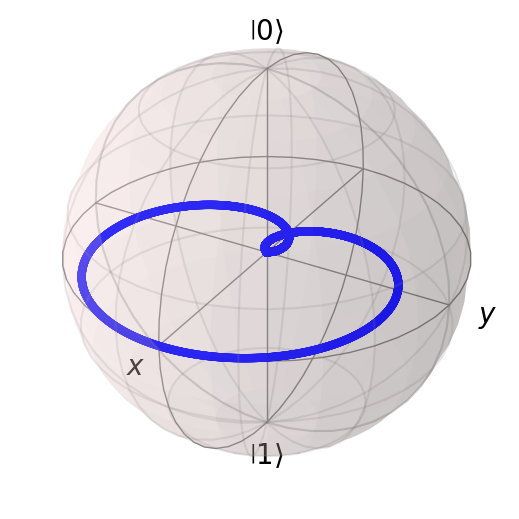

In [52]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res.expect, meth="s")
sphere.show()

10) Plot $X$, $Y$, $Z$

Not Include $\frac{\pi}{2}$ pulse, Initial State : $|+\rangle$

$\alpha(0)=3$

Text(0, 0.5, 'Expectation Value')

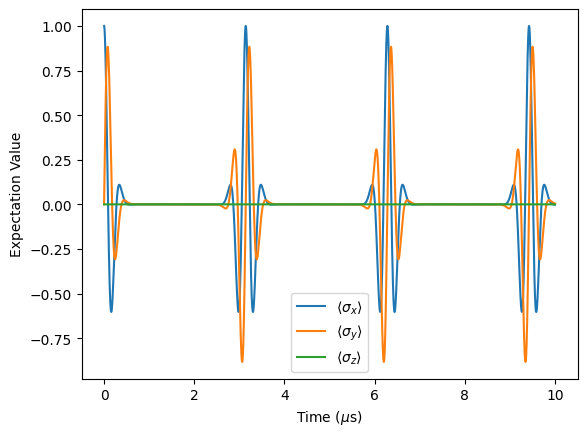

In [53]:
#plot X, Y, Z
alpha_0 = 3
H0 = chi*tensor(sz, a.dag()*a)
psi_plus = tensor((basis(2,0)+basis(2,1))/np.sqrt(2), coherent(N, alpha_0))

res = sesolve(H0, psi_plus, tlist, op_list)

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res.expect[0], label = r'$\langle\sigma_x\rangle$')
ax.plot(tlist, res.expect[1], label = r'$\langle\sigma_y\rangle$')
ax.plot(tlist, res.expect[2], label = r'$\langle\sigma_z\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

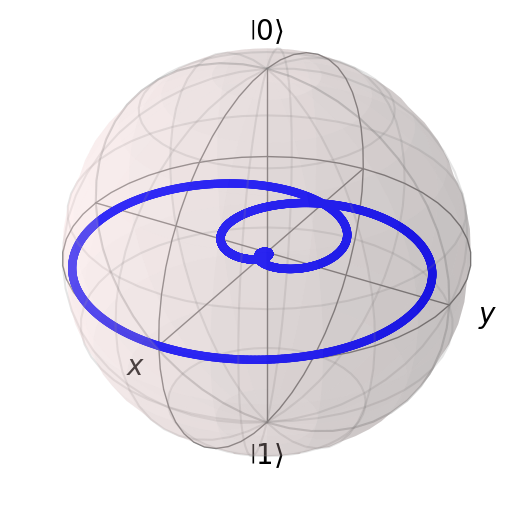

In [54]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res.expect, meth="s")
sphere.show()

11) Plot $X$, $Y$, $Z$

Not Include $\frac{\pi}{2}$ pulse, Initial State : $|+\rangle$

$\alpha(0)=5$

Text(0, 0.5, 'Expectation Value')

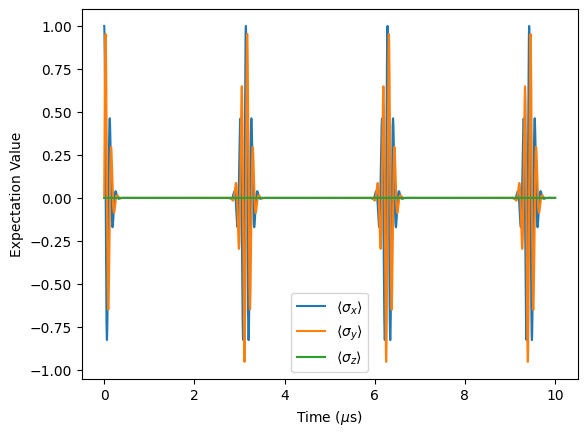

In [55]:
#plot X, Y, Z
alpha_0 = 5
H0 = chi*tensor(sz, a.dag()*a)
psi_plus = tensor((basis(2,0)+basis(2,1))/np.sqrt(2), coherent(N, alpha_0))

res = sesolve(H0, psi_plus, tlist, op_list)

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res.expect[0], label = r'$\langle\sigma_x\rangle$')
ax.plot(tlist, res.expect[1], label = r'$\langle\sigma_y\rangle$')
ax.plot(tlist, res.expect[2], label = r'$\langle\sigma_z\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

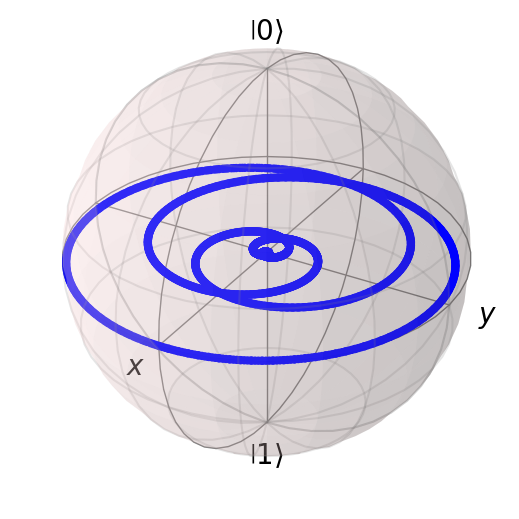

In [56]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res.expect, meth="s")
sphere.show()

#1. Resonator Drive Pulse

1) Hamiltonian & Photon Number Expectation

Note: Let us consider a case where the resonator is driven by such a drive with a constant amplitude $A_0$, i.e.,
$$\hat{H}_r (t) =\omega_r \hat{a}^\dagger \hat{a} + A_0 (\hat{a} + \hat{a}^\dagger) \cos{(\omega_{r,d} t)}.$$
We move to the frame rotating at the drive frequency of $\omega_{r,d}$ by performing the following transformation
$$\tilde{\hat{H}}_r = \hat{U}\hat{H}_r\hat{U}^\dagger + i\dot{\hat{U}}\hat{U}^\dagger,$$
where $\hat{U} = e^{i\omega_{r,d} t \hat{a}^\dagger\hat{a} }$. This gives
$$\tilde{\hat{H}}_r = (\omega_r - \omega_{r,d})\hat{a}^\dagger \hat{a} + \frac{A_0}{2}(\hat{a}e^{-i\omega_{r,d}t} + \hat{a}^\dagger e^{i\omega_{r,d}t})(e^{i\omega_{r,d}t} + e^{-i\omega_{r,d}t}) \approx (\omega_r - \omega_{r,d})\hat{a}^\dagger \hat{a} + \frac{A_0}{2}(\hat{a} + \hat{a}^\dagger ).$$

The Heisenberg equation of motion for $\hat{a}$, with an additional phenomenological term for decay, is given by
\begin{align*}
\dot{\hat{a}}(t) = \left[- i(\omega_r - \omega_{r,d}) - \frac{\kappa}{2}\right]\hat{a} - \frac{A_0}{2}.
\end{align*}
In the steady state, this gives the slowly-varying coherent state amplitude of
$$\alpha_{ss} = - \frac{A_0/2}{i(\omega_r - \omega_{r,d}) + \kappa/2}.$$
Therefore, the steady-state photon number is
$$
\bar{n}_{ss} = |\alpha_{ss}|^2 = \frac{(A_0 / 2)^2}{(\omega_r - \omega_{r,d})^2 + (\kappa / 2)^2 }
$$

In [305]:
# Basic parameters
N = 20 # dimension of Hilbert space (cavity)

omega_r = 2 * np.pi * 7.0  # resonator frequency in units of GHz
omega_rd = 2 * np.pi * 6.99  # qubit frequency in units of GHz
kappa = 2 * np.pi * 0.01   # external coupling rate of resonator in units of GHz

tau = 200 # readout pulse length in units of ns

tlist = np.linspace(0, 400, 1000)

In [306]:
# operator
a = destroy(N)

H0 = omega_r*a.dag()*a

2) Square Pulse

In [59]:
# time-dependent coefficient for drive
def Hrd_env(t, args):
    """
    Envelope function for the readout drive
    """
    A = args['A'] # amplitude of the readout drive
    T = args['T'] # duration of the readout drive, in units of ns

    return A * (0 <= t) * (t <= T)

def Hrd_coeff(t, args):
    omega_rd = args['omega_rd']
    return Hrd_env(t, args) * np.cos(omega_rd * t)

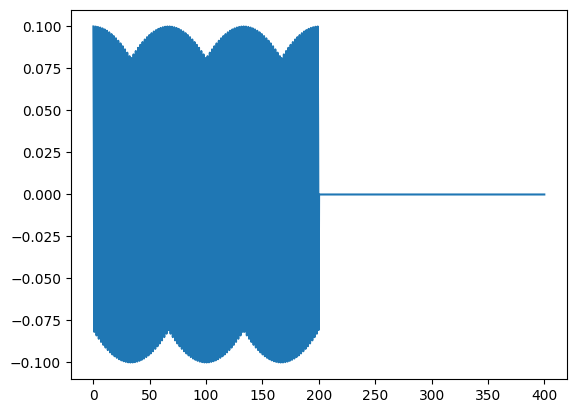

In [60]:
# list of times for numerical simulation (in units of ns)
plt.figure()
plt.plot(tlist, Hrd_coeff(tlist, {'A': 0.1, 'T': 200, 'omega_rd': omega_rd}))

In [61]:
A_drive = 0.01 * 2 * np.pi  # drive amplitude in units of GHz

result0 = mesolve(
    [H0, [a + a.dag(), Hrd_coeff]],
    basis(N, 0),
    tlist,
    c_ops = [np.sqrt(kappa) * a],
    args = {'A': A_drive, 'T': 200, 'omega_rd': omega_rd},
    e_ops = [a.dag() * a, a],
    options = Options(nsteps = 1000000, atol = 1e-10, rtol = 1e-8)
)

Text(0, 0.5, 'Photon Number Expectation Value')

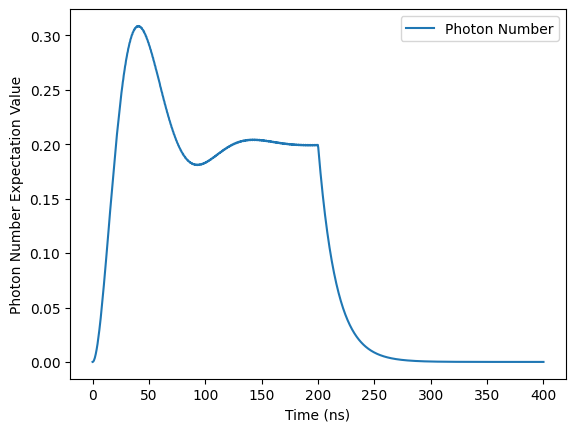

In [62]:
# Plot photon number expectation value

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result0.expect[0], label = 'Photon Number')
ax.legend(loc = 0)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Photon Number Expectation Value')

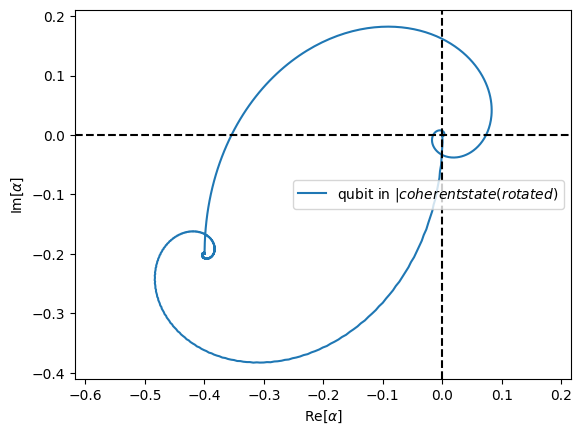

In [63]:
# Plot alpha

alpha0 = result0.expect[1] * np.exp(1j * omega_rd * tlist)

plt.figure(1)
plt.plot(alpha0.real, alpha0.imag, label=r'qubit in $|coherent state(rotated)$')
plt.xlabel(r'Re[$\alpha$]')
plt.ylabel(r'Im[$\alpha$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

3) Gaussian Pulse

In [64]:
# time-dependent coefficient for drive
def Hrd_env_gauss(t, args):
    """
    Envelope function for the readout drive
    """
    A = args['A'] # amplitude of the readout drive
    T = args['T'] # duration of the readout drive, in units of ns

    return A * np.exp(-((t-T/2)**2/((T/4)**2)))*(0 <= t) * (t <= T)

def Hrd_coeff_gauss(t, args):
    omega_rd = args['omega_rd']
    return Hrd_env_gauss(t, args) * np.cos(omega_rd * t)

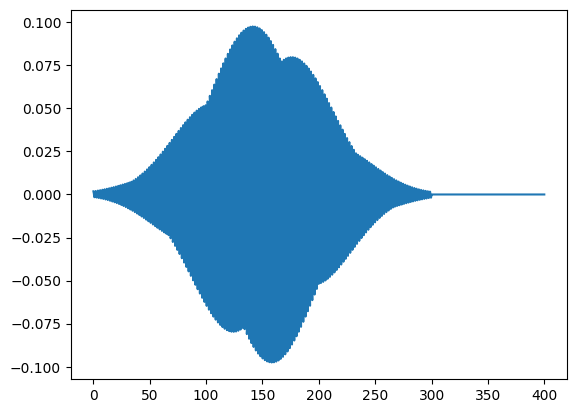

In [65]:
# list of times for numerical simulation (in units of ns)
plt.figure()
plt.plot(tlist, Hrd_coeff_gauss(tlist, {'A': 0.1, 'T': 300, 'omega_rd': omega_rd}))

In [66]:
A_drive = 0.05 * 2 * np.pi  # drive amplitude in units of GHz

result1 = mesolve(
    [H0, [a + a.dag(), Hrd_coeff_gauss]],
    basis(N, 0),
    tlist,
    c_ops = [np.sqrt(kappa) * a],
    args = {'A': A_drive, 'T': 200, 'omega_rd': omega_rd},
    e_ops = [a.dag() * a, a],
    options = Options(nsteps = 1000000, atol = 1e-10, rtol = 1e-8)
)

Text(0, 0.5, 'Photon Number Expectation Value')

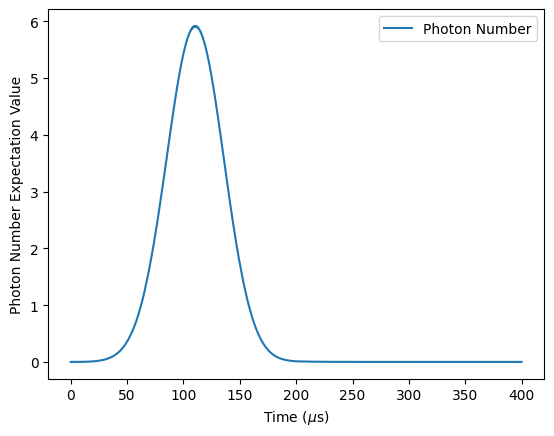

In [67]:
# Plot photon number expectation value
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result1.expect[0], label = 'Photon Number')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Photon Number Expectation Value')

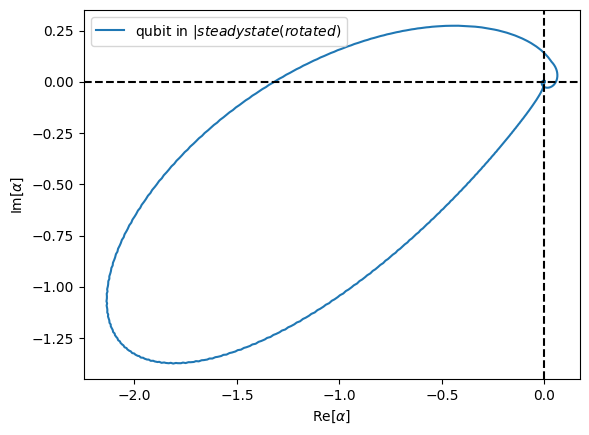

In [68]:
# Plot alpha

alpha1 = result1.expect[1] * np.exp(1j * omega_rd * tlist)

plt.figure()
plt.plot(alpha1.real, alpha1.imag, label=r'qubit in $|steady state(rotated)$')
plt.xlabel(r'Re[$\alpha$]')
plt.ylabel(r'Im[$\alpha$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

4) Exponential Pulse

In [69]:
# time-dependent coefficient for drive
def Hrd_env_exp(t, args):
    """
    Envelope function for the readout drive
    """
    A = args['A'] # amplitude of the readout drive
    T = args['T'] # duration of the readout drive, in units of ns

    return A * np.exp(t/(T/4))*(0 <= t) * (t <= T)

def Hrd_coeff_exp(t, args):
    omega_rd = args['omega_rd']
    return Hrd_env_exp(t, args) * np.cos(omega_rd * t)

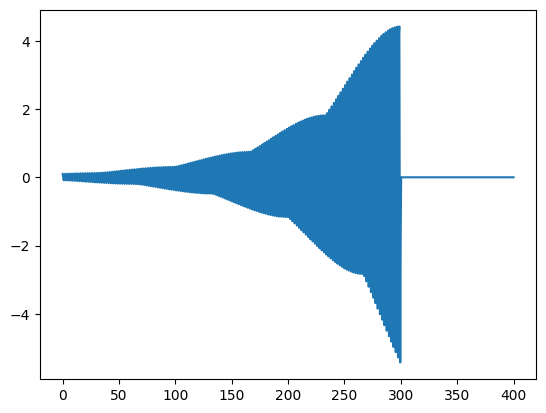

In [70]:
# list of times for numerical simulation (in units of ns)
plt.figure()
plt.plot(tlist, Hrd_coeff_exp(tlist, {'A': 0.1, 'T': 300, 'omega_rd': omega_rd}))

In [71]:
A_drive = 0.001 * 2 * np.pi  # drive amplitude in units of GHz

result2 = mesolve(
    [H0, [a + a.dag(), Hrd_coeff_exp]],
    basis(N, 0),
    tlist,
    c_ops = [np.sqrt(kappa) * a],
    args = {'A': A_drive, 'T': 200, 'omega_rd': omega_rd},
    e_ops = [a.dag() * a, a],
    options = Options(nsteps = 1000000, atol = 1e-10, rtol = 1e-8)
)

Text(0, 0.5, 'Photon Number Expectation Value')

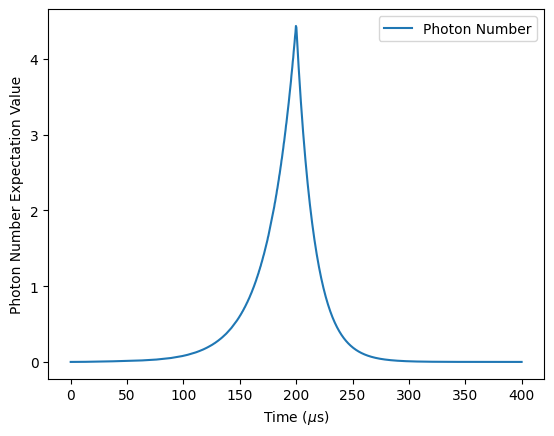

In [72]:
# Plot photon number expectation value
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result2.expect[0], label = 'Photon Number')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Photon Number Expectation Value')

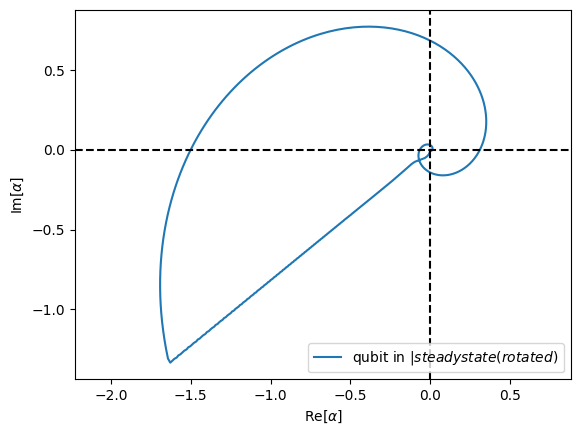

In [73]:
# Plot alpha

alpha2 = result2.expect[1] * np.exp(1j * omega_rd * tlist)

plt.figure()
plt.plot(alpha2.real, alpha2.imag, label=r'qubit in $|steady state(rotated)$')
plt.xlabel(r'Re[$\alpha$]')
plt.ylabel(r'Im[$\alpha$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

5) Sin Pulse

In [74]:
# time-dependent coefficient for drive
def Hrd_env_sin(t, args):
    """
    Envelope function for the readout drive
    """
    A = args['A'] # amplitude of the readout drive
    T = args['T'] # duration of the readout drive, in units of ns

    return A * np.sin(t/(T/10))*(0 <= t) * (t <= T)

def Hrd_coeff_sin(t, args):
    omega_rd = args['omega_rd']
    return Hrd_env_sin(t, args) * np.cos(omega_rd * t)

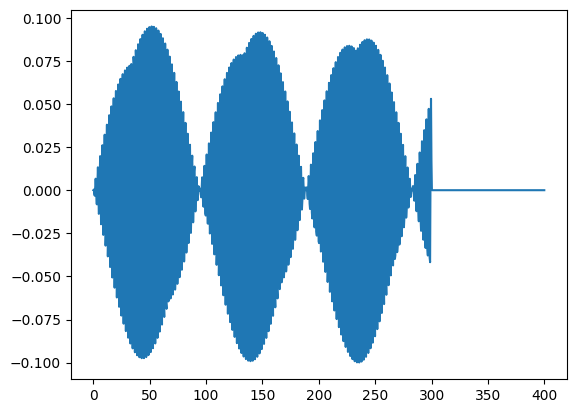

In [75]:
# list of times for numerical simulation (in units of ns)
plt.figure()
plt.plot(tlist, Hrd_coeff_sin(tlist, {'A': 0.1, 'T': 300, 'omega_rd': omega_rd}))

In [76]:
A_drive = 0.01 * 2 * np.pi  # drive amplitude in units of GHz

result3 = mesolve(
    [H0, [a + a.dag(), Hrd_coeff_sin]],
    basis(N, 0),
    tlist,
    c_ops = [np.sqrt(kappa) * a],
    args = {'A': A_drive, 'T': 200, 'omega_rd': omega_rd},
    e_ops = [a.dag() * a, a],
    options = Options(nsteps = 1000000, atol = 1e-10, rtol = 1e-8)
)

Text(0, 0.5, 'Photon Number Expectation Value')

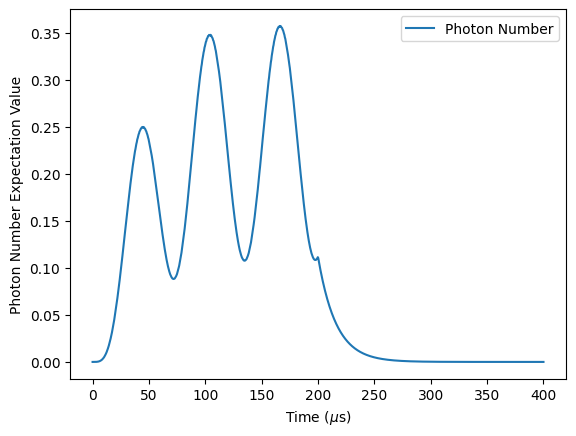

In [77]:
# Plot photon number expectation value
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result3.expect[0], label = 'Photon Number')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Photon Number Expectation Value')

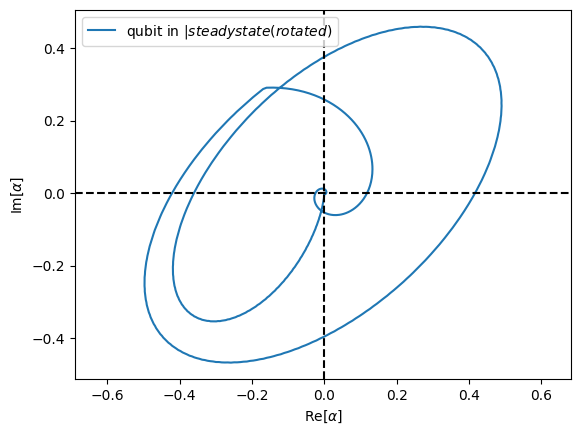

In [78]:
# Plot alpha

alpha3 = result3.expect[1] * np.exp(1j * omega_rd * tlist)

plt.figure()
plt.plot(alpha3.real, alpha3.imag, label=r'qubit in $|steady state(rotated)$')
plt.xlabel(r'Re[$\alpha$]')
plt.ylabel(r'Im[$\alpha$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

6) Convolution of Square & Gaussian Pulse

In [7]:
def Gaussian(t, args):
    sig = args['Sigma']
    return 1 / np.sqrt(2 * np.pi * sig **2) * np.exp(-(t ** 2) / (2 * sig **2))

def Square(t, args):
    A = args['A']  # amplitude of the readout drive
    T_end = args['T_end']  # duration of the readout drive, in units of ns
    return A * (-T_end/4 <= t) * (t <= T_end/4)

def Hrd_env_conv(t_array, args):
    args_gauss = {'Sigma': args['Sigma']}
    args_square = {'A': args['A'], 'T_end': args['T_end']}

    T_end = args['T_end']

    gauss_values = np.array([Gaussian(ti-T_end/2, args_gauss) for ti in t_array])
    square_values = np.array([Square(ti-T_end/2, args_square) for ti in t_array])

    conv_discrete = np.convolve(gauss_values, square_values, 'same')
    conv_continuous = scipy.interpolate.interp1d(t_array, conv_discrete, fill_value="extrapolate")
    return conv_continuous

def Hrd_coeff_conv(t, args):
    T_end = args['T_end']
    T_step = args['T_step']
    conv_continuous = Hrd_env_conv(np.linspace(0, T_end, T_step), args)
    return conv_continuous(t) * np.cos(args['omega_rd'] * t)

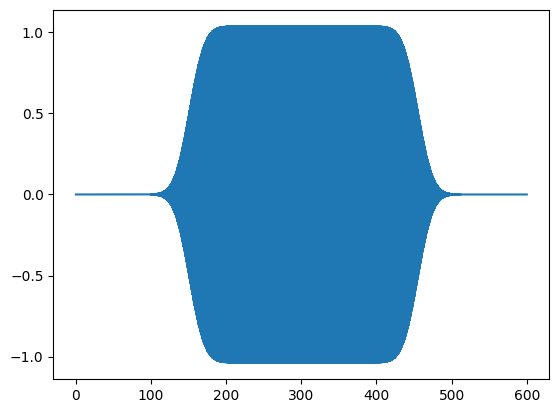

In [28]:
# list of times for numerical simulation (in units of ns)
tlist = np.linspace(0,600,100000)
plt.figure()
plt.plot(tlist, Hrd_coeff_conv(tlist, {'A': 2 * np.pi, 'Sigma': 1/kappa, 'omega_rd': omega_rd, 'T_end': 600, 'T_step': 100}))

In [31]:
# Problem in solving mesolve
H0 = omega_r*a.dag()*a

tlist = np.linspace(0, 600, 1000)
result4 = mesolve(
    [H0, [a + a.dag(), Hrd_coeff_conv]],
    basis(N, 0),
    tlist,
    c_ops = [np.sqrt(kappa) * a],
    args = {'A': 0.1 * 2 * np.pi, 'Sigma': 1/kappa, 'omega_rd': omega_rd, 'T_end': 600, 'T_step': 100},
    e_ops = [a.dag() * a, a],
    options = Options(nsteps = 100000, atol = 1e-10, rtol = 1e-8)
)

Text(0, 0.5, 'Photon Number Expectation Value')

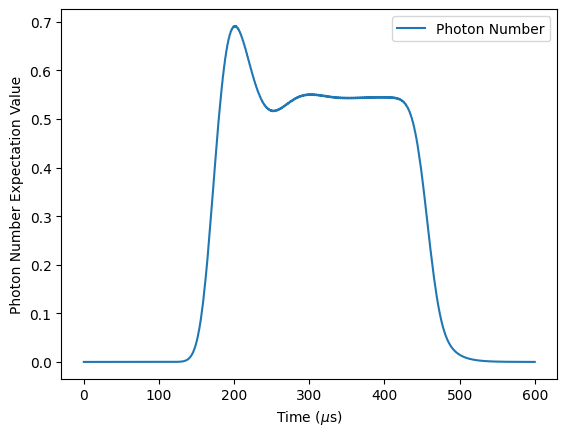

In [32]:
# Plot photon number expectation value
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result4.expect[0], label = 'Photon Number')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Photon Number Expectation Value')

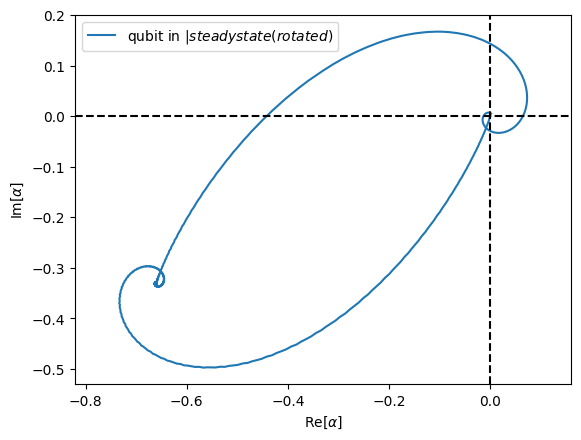

In [33]:
# Plot alpha

alpha4 = result4.expect[1] * np.exp(1j * omega_rd * tlist)

plt.figure()
plt.plot(alpha4.real, alpha4.imag, label=r'qubit in $|steady state(rotated)$')
plt.xlabel(r'Re[$\alpha$]')
plt.ylabel(r'Im[$\alpha$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

7) Comparison between Square & Convolution

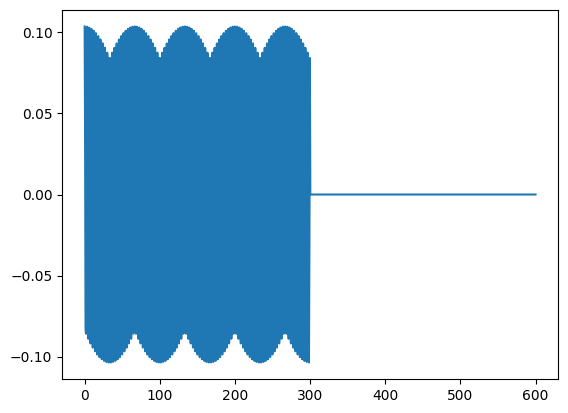

In [315]:
# list of times for numerical simulation (in units of ns)
tlist = np.linspace(0, 600, 1000)
plt.figure()
plt.plot(tlist, Hrd_coeff(tlist, {'A': 0.016494 * 2 * np.pi, 'omega_rd': omega_rd, 'T': 300}))

In [316]:
# Problem in solving mesolve
H0 = omega_r*a.dag()*a
tlist = np.linspace(0, 600, 1000)
args = {'A': 0.016494 * 2 * np.pi, 'omega_rd': omega_rd, 'T': 300}

result5 = mesolve(
    [H0, [a + a.dag(), Hrd_coeff]],
    basis(N, 0),
    tlist,
    c_ops=[np.sqrt(kappa) * a],
    args=args,
    e_ops=[a.dag() * a, a],
    options=Options(nsteps=100000, atol=1e-10, rtol=1e-8)
)

Text(0, 0.5, 'Photon Number Expectation Value')

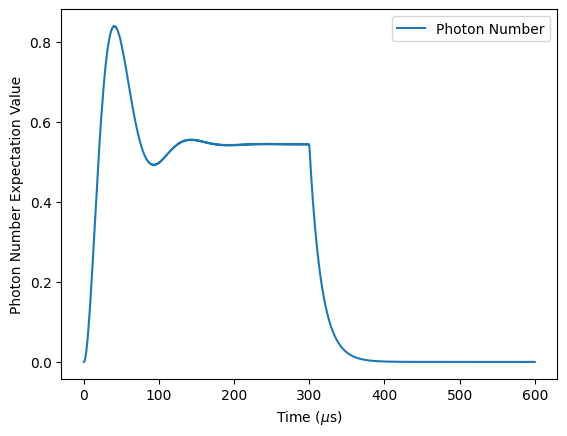

In [317]:
# Plot photon number expectation value
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result5.expect[0], label = 'Photon Number')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Photon Number Expectation Value')

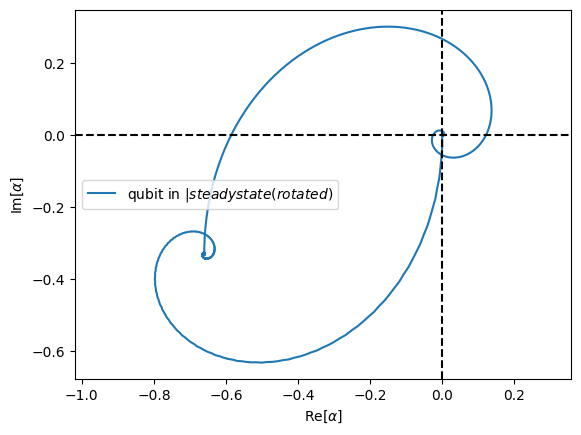

In [318]:
# Plot alpha

alpha5 = result5.expect[1] * np.exp(1j * omega_rd * tlist)

plt.figure()
plt.plot(alpha5.real, alpha5.imag, label=r'qubit in $|steady state(rotated)$')
plt.xlabel(r'Re[$\alpha$]')
plt.ylabel(r'Im[$\alpha$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

Text(0, 0.5, 'Photon Number Expectation Value')

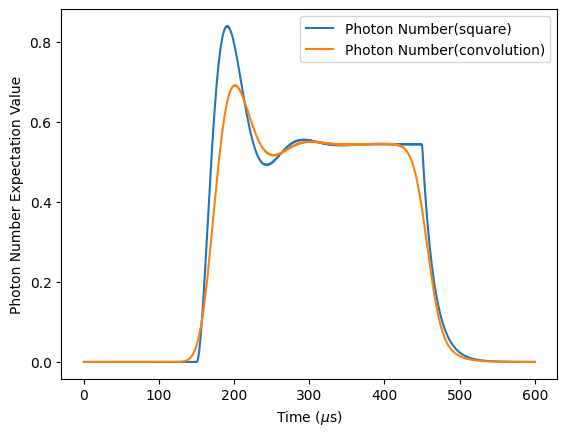

In [320]:
# Compare photon number expectation value
result5_shifted = np.zeros(1000)
for i in range(250, 1000):
  result5_shifted[i] = result5.expect[0][i-250]

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result5_shifted, label = 'Photon Number(square)')
ax.plot(tlist, result4.expect[0], label = 'Photon Number(convolution)')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Photon Number Expectation Value')

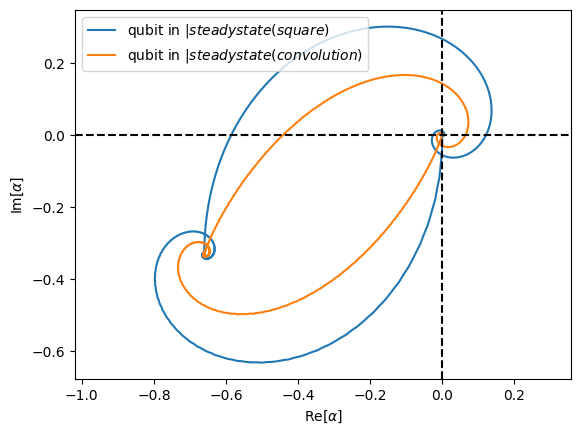

In [321]:
# Compare alpha

alpha5 = result5.expect[1] * np.exp(1j * omega_rd * tlist)
alpha4 = result4.expect[1] * np.exp(1j * omega_rd * tlist)

plt.figure()
plt.plot(alpha5.real, alpha5.imag, label=r'qubit in $|steady state(square)$')
plt.plot(alpha4.real, alpha4.imag, label=r'qubit in $|steady state(convolution)$')
plt.xlabel(r'Re[$\alpha$]')
plt.ylabel(r'Im[$\alpha$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

8) Square Pulse (Very Large Detuning)

In [118]:
# Basic parameters
N = 20 # dimension of Hilbert space (cavity)

omega_r = 2 * np.pi * 7.0  # resonator frequency in units of GHz
omega_rd = 2 * np.pi * 5.5  # qubit frequency in units of GHz
kappa = 2 * np.pi * 0.01   # external coupling rate of resonator in units of GHz

tau = 200 # readout pulse length in units of ns

tlist = np.linspace(0, 400, 10000000)

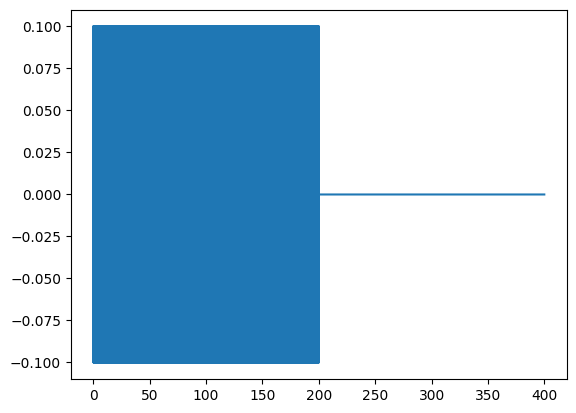

In [98]:
# list of times for numerical simulation (in units of ns)
plt.figure()
plt.plot(tlist, Hrd_coeff(tlist, {'A': 0.1, 'T': 200, 'omega_rd': omega_rd}))

In [99]:
A_drive = 0.01 * 2 * np.pi  # drive amplitude in units of GHz

result6 = mesolve(
    [H0, [a + a.dag(), Hrd_coeff]],
    basis(N, 0),
    tlist,
    c_ops = [np.sqrt(kappa) * a],
    args = {'A': A_drive, 'T': 200, 'omega_rd': omega_rd},
    e_ops = [a.dag() * a, a],
    options = Options(nsteps = 10000000, atol = 1e-10, rtol = 1e-8)
)

Text(0, 0.5, 'Photon Number Expectation Value')

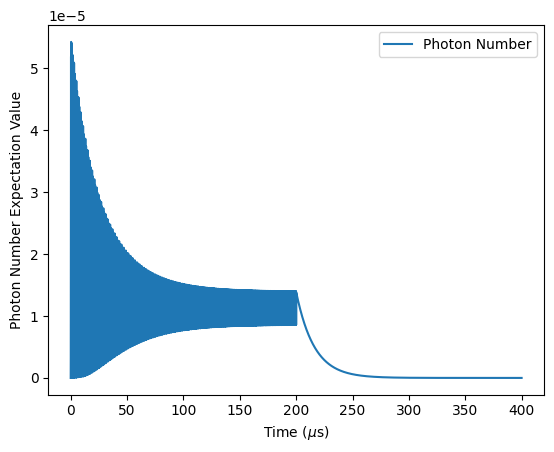

In [100]:
# Plot photon number expectation value
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result6.expect[0], label = 'Photon Number')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Photon Number Expectation Value')

(0.0, 5.0)

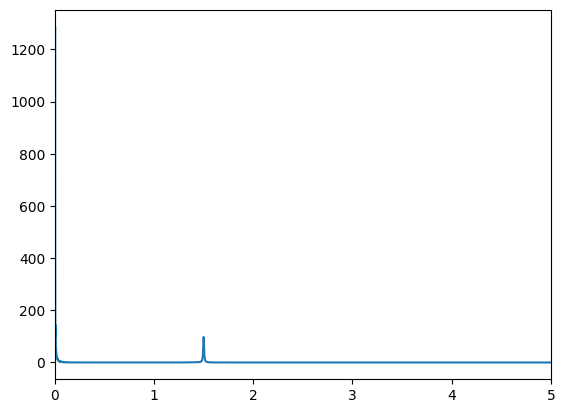

In [101]:
n_rfft = np.fft.rfft(result6.expect[0]-np.mean(result6.expect[0]))
freq = np.fft.rfftfreq(len(result6.expect[0]), d=tlist[1]-tlist[0])

plt.figure()
plt.plot(freq, np.abs(n_rfft) ** 2)
plt.xlim(0,5)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


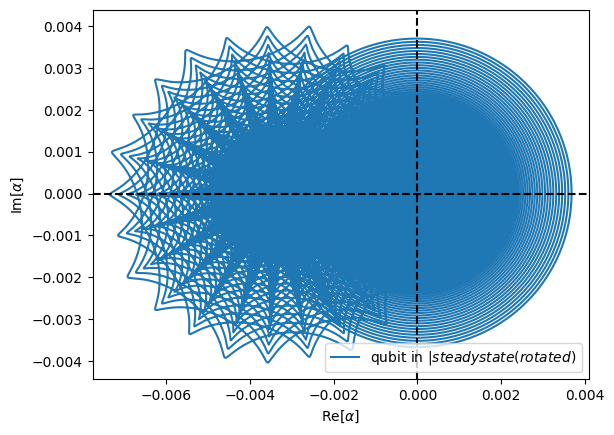

In [102]:
# Plot alpha

alpha6 = result6.expect[1] * np.exp(1j * omega_rd * tlist)

plt.figure()
plt.plot(alpha6.real, alpha6.imag, label=r'qubit in $|steady state(rotated)$')
plt.xlabel(r'Re[$\alpha$]')
plt.ylabel(r'Im[$\alpha$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

9) Gaussian Pulse (Very Large Detuning)

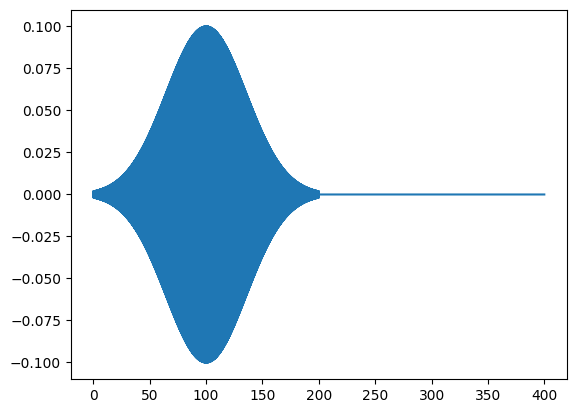

In [103]:
# list of times for numerical simulation (in units of ns)
plt.figure()
plt.plot(tlist, Hrd_coeff_gauss(tlist, {'A': 0.1, 'T': 200, 'omega_rd': omega_rd}))

In [104]:
A_drive = 0.05 * 2 * np.pi  # drive amplitude in units of GHz

result7 = mesolve(
    [H0, [a + a.dag(), Hrd_coeff_gauss]],
    basis(N, 0),
    tlist,
    c_ops = [np.sqrt(kappa) * a],
    args = {'A': A_drive, 'T': 200, 'omega_rd': omega_rd},
    e_ops = [a.dag() * a, a],
    options = Options(nsteps = 1000000, atol = 1e-10, rtol = 1e-8)
)

Text(0, 0.5, 'Photon Number Expectation Value')

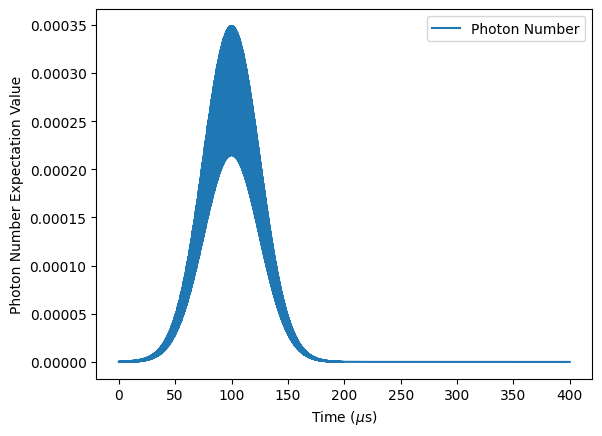

In [105]:
# Plot photon number expectation value
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result7.expect[0], label = 'Photon Number')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Photon Number Expectation Value')

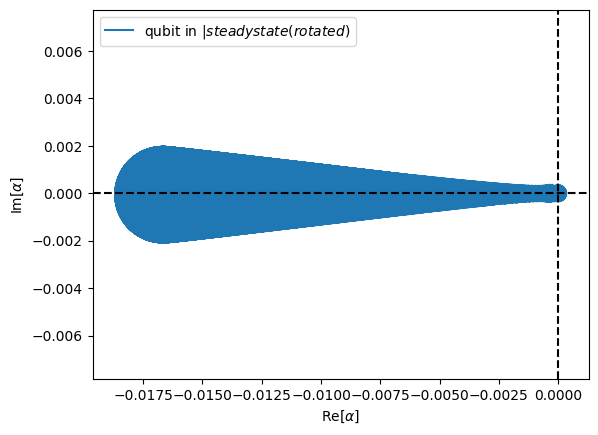

In [119]:
# Plot alpha
tlist = np.linspace(0, 400, 10000000)

alpha7 = result7.expect[1] * np.exp(1j * omega_rd * tlist)

plt.figure()
plt.plot(alpha7.real, alpha7.imag, label=r'qubit in $|steady state(rotated)$')
plt.xlabel(r'Re[$\alpha$]')
plt.ylabel(r'Im[$\alpha$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

#2. Time-Independent Qubit-Resonator Hamiltonian (Quantum Rabi Model)

1) Hamiltonian without Drive

$H = -\frac{\omega_q}{2}\sigma_z + \omega_r a^\dagger a + g\sigma_x(a+a^\dagger) $

In [ ]:
# constant
N = 20

omega_r = 2 * np.pi * 7.0  # resonator frequency in units of GHz
omega_q = 2 * np.pi * 5.5  # qubit frequency in units of GHz
omega_rd = 2 * np.pi * 6.99  # qubit frequency in units of GHz
g = 2 * np.pi * 0.2        # qubit-resonator coupling in units of GHz
kappa = 2 * np.pi * 0.01   # external coupling rate of resonator in units of GHz

In [ ]:
# operator
sz = sigmaz()
sx = sigmax()
sy = sigmay()

sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()

a = destroy(N)

H2 = -0.5*omega_q*tensor(sz, qeye(N)) + omega_r*tensor(qeye(2), a.dag()*a) + g*tensor(sx, a + a.dag())

In [ ]:
sx_composite = tensor(sx, qeye(N))
sy_composite = tensor(sy, qeye(N))
sz_composite = tensor(sz, qeye(N))
sp_composite = tensor(sp, qeye(N))
sm_composite = tensor(sm, qeye(N))

annihilate_composite = tensor(qeye(2), a)
create_composite = tensor(qeye(2), a.dag())
number_composite = tensor(qeye(2), a.dag()*a)

tlist = np.linspace(0,400,10000)
op_list = [sx_composite, sy_composite, sz_composite, sp_composite, sm_composite, annihilate_composite, create_composite, number_composite]

psi_20 = tensor(basis(2,0), basis(N,0))
psi_2p = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), basis(N,0))
psi_21 = tensor(basis(2,1), basis(N,0))

2) Hamiltonian with Drive

$H = -\frac{\omega_q}{2}\sigma_z + \omega_r a^\dagger a + g\sigma_x(a+a^\dagger) + A(t) (\hat{a} + \hat{a}^\dagger) \cos{(\omega_{r,d} t)}$

In [272]:
# constant
N = 20

omega_r = 2 * np.pi * 7.0  # resonator frequency in units of GHz
omega_q = 2 * np.pi * 5.5  # qubit frequency in units of GHz
omega_rd = 2 * np.pi * 6.99  # qubit frequency in units of GHz
g = 2 * np.pi * 0.2        # qubit-resonator coupling in units of GHz
kappa = 2 * np.pi * 0.01   # external coupling rate of resonator in units of GHz

In [273]:
# operator
sz = sigmaz()
sx = sigmax()
sy = sigmay()

sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()

a = destroy(N)

H2 = -0.5*omega_q*tensor(sz, qeye(N)) + omega_r*tensor(qeye(2), a.dag()*a) + g*tensor(sx, a + a.dag())

In [274]:
sx_composite = tensor(sx, qeye(N))
sy_composite = tensor(sy, qeye(N))
sz_composite = tensor(sz, qeye(N))
sp_composite = tensor(sp, qeye(N))
sm_composite = tensor(sm, qeye(N))

annihilate_composite = tensor(qeye(2), a)
create_composite = tensor(qeye(2), a.dag())
number_composite = tensor(qeye(2), a.dag()*a)

tlist = np.linspace(0,400,10000)
op_list = [sx_composite, sy_composite, sz_composite, sp_composite, sm_composite, annihilate_composite, create_composite, number_composite]

psi_20 = tensor(basis(2,0), basis(N,0))
psi_2p = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), basis(N,0))
psi_21 = tensor(basis(2,1), basis(N,0))

In [275]:
# time-dependent coefficient for drive
def Hrd_env(t, args):
    """
    Envelope function for the readout drive
    """
    A = args['A'] # amplitude of the readout drive
    T = args['T'] # duration of the readout drive, in units of ns

    return A * (0 <= t) * (t <= T)

def Hrd_coeff(t, args):
    omega_rd = args['omega_rd']
    return Hrd_env(t, args) * np.cos(omega_rd * t)

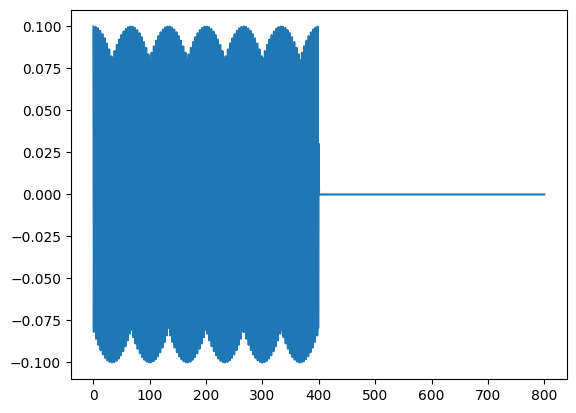

In [276]:
# list of times for numerical simulation (in units of ns)
tlist = np.linspace(0, 800, 1000)
plt.figure()
plt.plot(tlist, Hrd_coeff(tlist, {'A': 0.1, 'T': 400, 'omega_rd': omega_rd}))

3) Qubit in Initial State : $|0\rangle$

Weak Coupling

In [277]:
tlist = np.linspace(0, 800, 1000)

result20 = mesolve(
    [H2, [tensor(qeye(2), a+a.dag()), Hrd_coeff]],
    psi_20,
    tlist,
    c_ops = [np.sqrt(kappa) * tensor(qeye(2), a)],
    args = {'A': 0.01 * 2 * np.pi, 'T': 400, 'omega_rd': omega_rd},
    e_ops = op_list,
    options = Options(nsteps = 100000, atol = 1e-10, rtol = 1e-8)
)

Text(0, 0.5, 'Expectation Value')

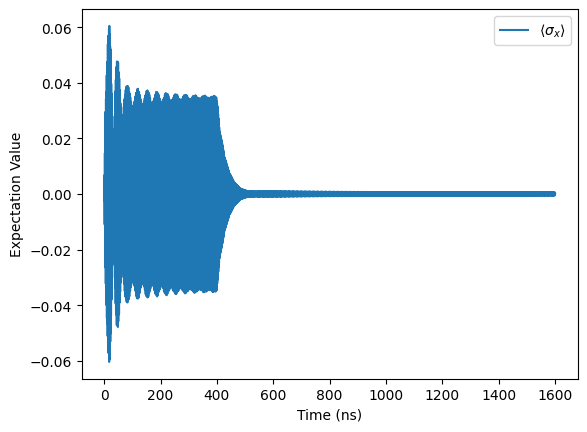

In [278]:
# Plot X, Y, Z

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result20.expect[0], label = r'$\langle\sigma_x\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Expectation Value')

Text(0, 0.5, 'Expectation Value')

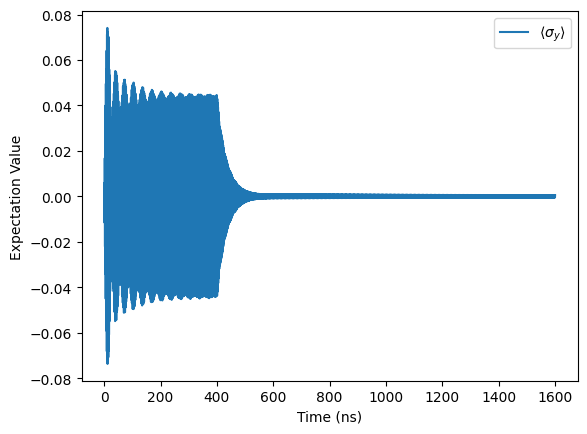

In [279]:
# Plot X, Y, Z

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result20.expect[1], label = r'$\langle\sigma_y\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Expectation Value')

Text(0, 0.5, 'Expectation Value')

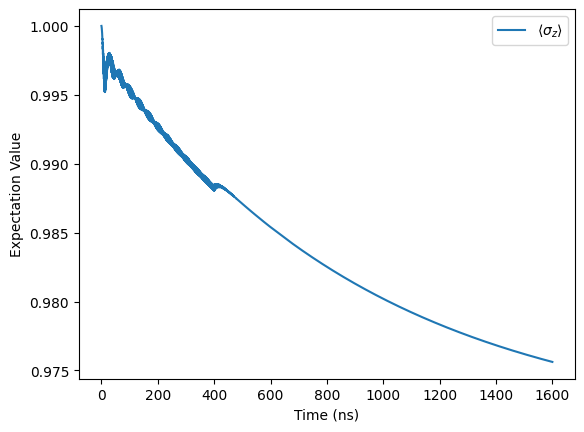

In [280]:
# Plot X, Y, Z

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result20.expect[2], label = r'$\langle\sigma_z\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Expectation Value')

Text(0, 0.5, 'Expectation Value')

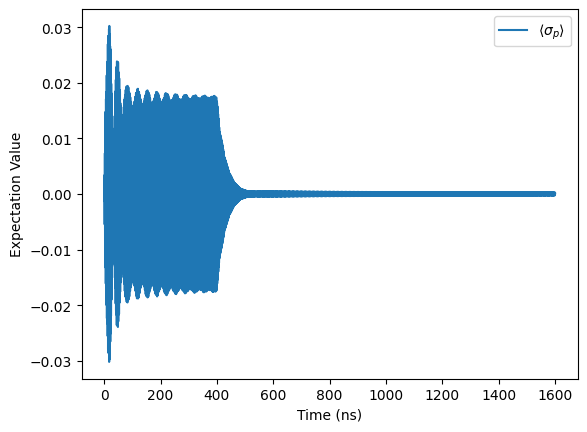

In [281]:
# Plot SP, SM

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result20.expect[3], label = r'$\langle\sigma_p\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Expectation Value')

Text(0, 0.5, 'Expectation Value')

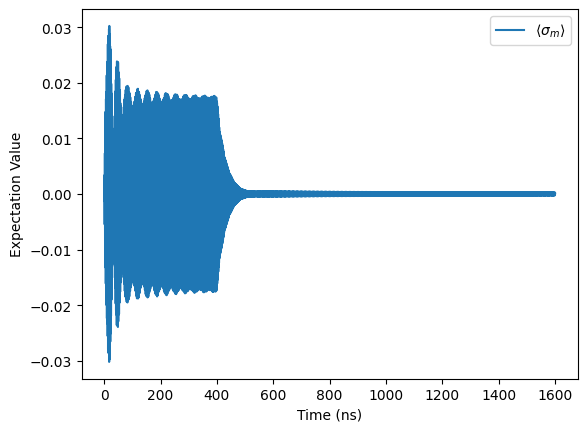

In [282]:
# Plot SP, SM

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result20.expect[4], label = r'$\langle\sigma_m\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Expectation Value')

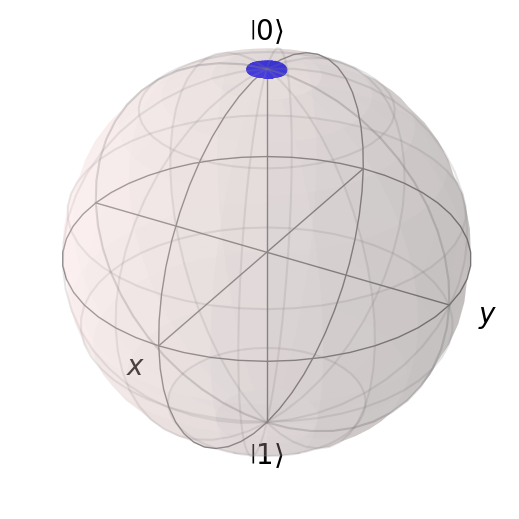

In [283]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(result20.expect, meth="s")
sphere.show()

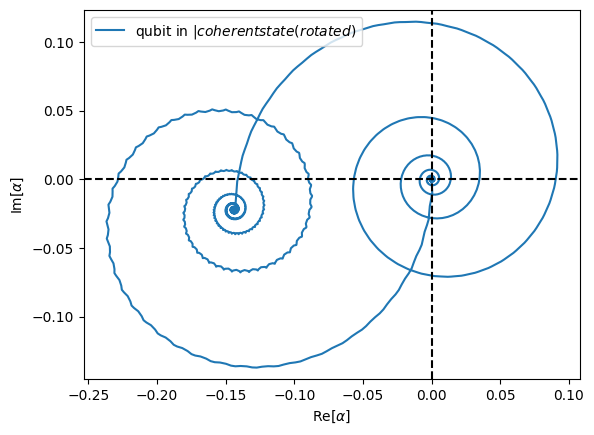

In [284]:
# Plot alpha

alpha20 = result20.expect[5] * np.exp(1j * omega_rd * tlist)

plt.figure(1)
plt.plot(alpha20.real, alpha20.imag, label=r'qubit in $|coherent state(rotated)$')
plt.xlabel(r'Re[$\alpha$]')
plt.ylabel(r'Im[$\alpha$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

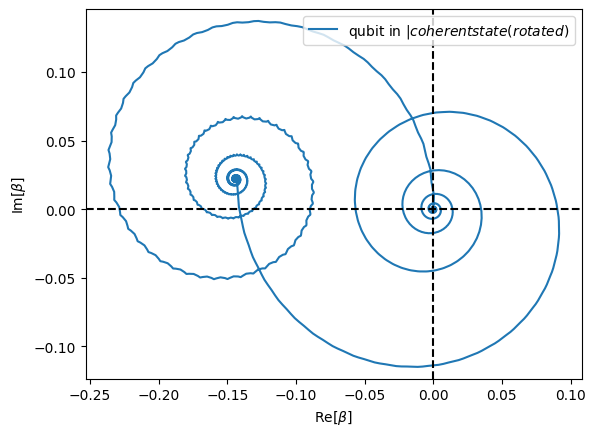

In [324]:
# Plot alpha's dagger

beta20 = result20.expect[6] * np.exp(-1j * omega_rd * tlist)

plt.figure(1)
plt.plot(beta20.real, beta20.imag, label=r'qubit in $|coherent state(rotated)$')
plt.xlabel(r'Re[$\beta$]')
plt.ylabel(r'Im[$\beta$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

Text(0, 0.5, 'Photon Number Expectation Value')

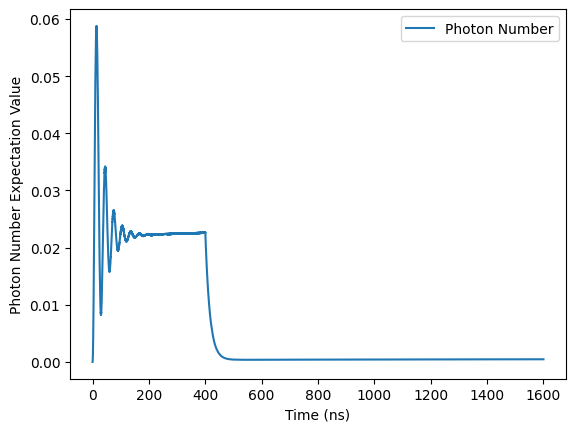

In [286]:
# Plot photon number expectation value

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result20.expect[7], label = 'Photon Number')
ax.legend(loc = 0)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Photon Number Expectation Value')

4) Qubit in Initial State : $|1\rangle$

Weak Coupling

In [287]:
tlist = np.linspace(0, 800, 1000)

result21 = mesolve(
    [H2, [tensor(qeye(2), a+a.dag()), Hrd_coeff]],
    psi_21,
    tlist,
    c_ops = [np.sqrt(kappa) * tensor(qeye(2), a)],
    args = {'A': 0.01 * 2 * np.pi, 'T': 400, 'omega_rd': omega_rd},
    e_ops = op_list,
    options = Options(nsteps = 100000, atol = 1e-10, rtol = 1e-8)
)

Text(0, 0.5, 'Expectation Value')

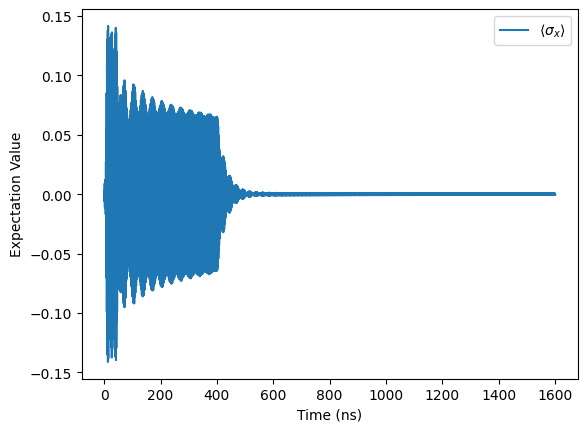

In [288]:
# Plot X, Y, Z

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result21.expect[0], label = r'$\langle\sigma_x\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Expectation Value')

Text(0, 0.5, 'Expectation Value')

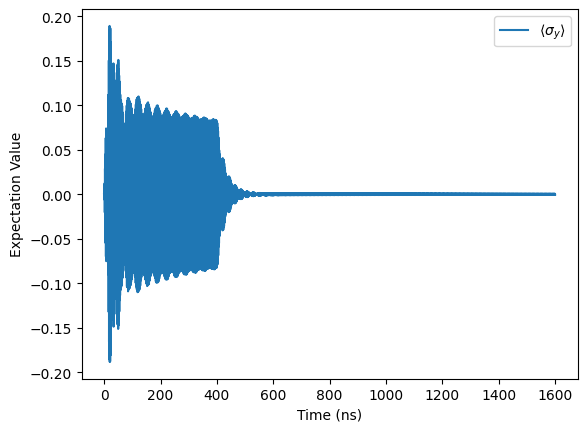

In [289]:
# Plot X, Y, Z

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result21.expect[1], label = r'$\langle\sigma_y\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Expectation Value')

Text(0, 0.5, 'Expectation Value')

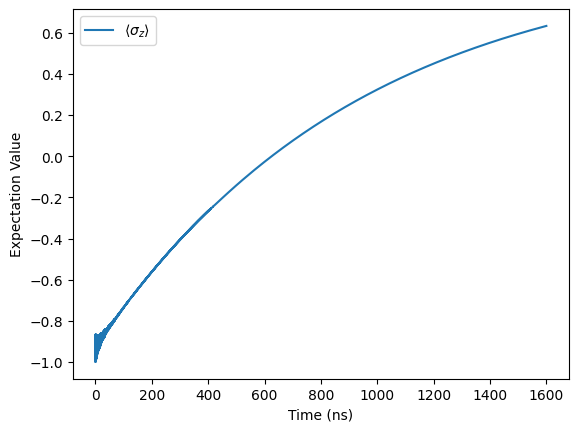

In [290]:
# Plot X, Y, Z

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result21.expect[2], label = r'$\langle\sigma_z\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Expectation Value')

Text(0, 0.5, 'Expectation Value')

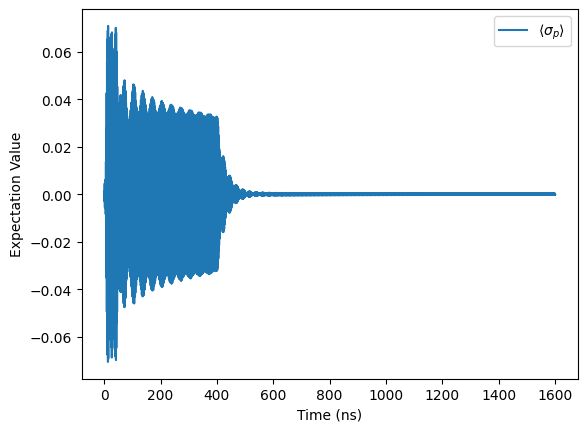

In [291]:
# Plot SP, SM

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result21.expect[3], label = r'$\langle\sigma_p\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Expectation Value')

Text(0, 0.5, 'Expectation Value')

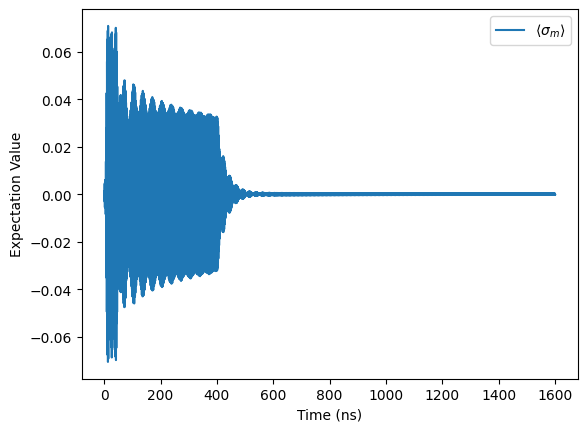

In [292]:
# Plot SP, SM

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result21.expect[4], label = r'$\langle\sigma_m\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Expectation Value')

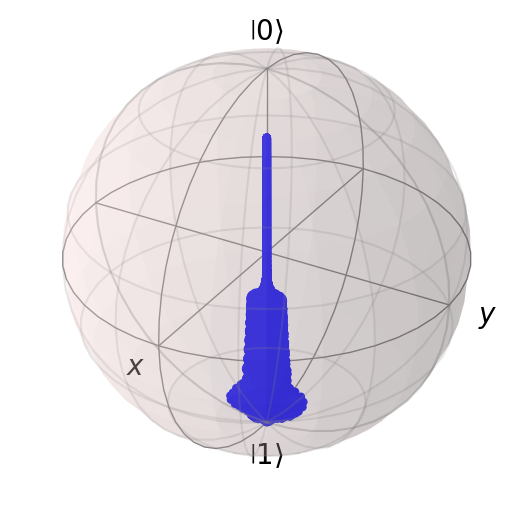

In [293]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(result21.expect, meth="s")
sphere.show()

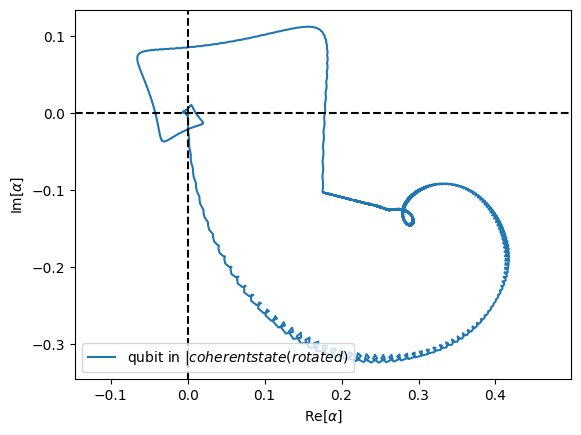

In [294]:
# Plot alpha

alpha21 = result21.expect[5] * np.exp(1j * omega_rd * tlist)

plt.figure(1)
plt.plot(alpha21.real, alpha21.imag, label=r'qubit in $|coherent state(rotated)$')
plt.xlabel(r'Re[$\alpha$]')
plt.ylabel(r'Im[$\alpha$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

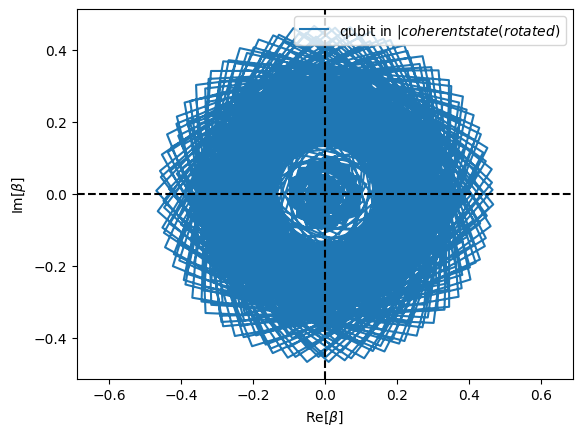

In [295]:
# Plot alpha's dagger

beta21 = result21.expect[6] * np.exp(-1j * omega_rd * tlist)

plt.figure(1)
plt.plot(beta21.real, beta21.imag, label=r'qubit in $|coherent state(rotated)$')
plt.xlabel(r'Re[$\beta$]')
plt.ylabel(r'Im[$\beta$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

Text(0, 0.5, 'Photon Number Expectation Value')

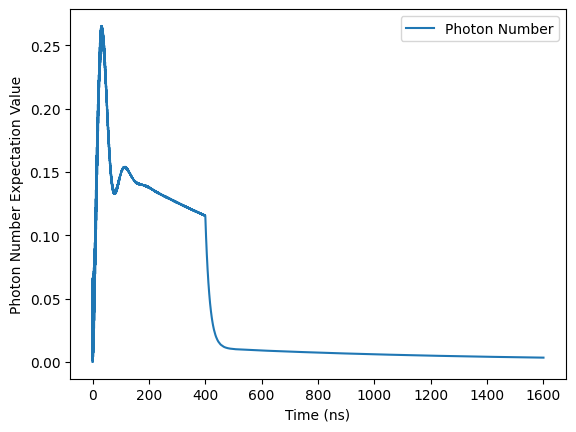

In [296]:
# Plot photon number expectation value

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result21.expect[7], label = 'Photon Number')
ax.legend(loc = 0)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Photon Number Expectation Value')

4) Qubit in Initial State : $|+\rangle$

Weak Coupling

In [297]:
tlist = np.linspace(0, 800, 1000)

result2p = mesolve(
    [H2, [tensor(qeye(2), a+a.dag()), Hrd_coeff]],
    psi_2p,
    tlist,
    c_ops = [np.sqrt(kappa) * tensor(qeye(2), a)],
    args = {'A': 0.01 * 2 * np.pi, 'T': 400, 'omega_rd': omega_rd},
    e_ops = op_list,
    options = Options(nsteps = 100000, atol = 1e-10, rtol = 1e-8)
)

KeyboardInterrupt: ignored

In [ ]:
# Plot X, Y, Z

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result2p.expect[0], label = r'$\langle\sigma_x\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Expectation Value')

In [ ]:
# Plot X, Y, Z

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result2p.expect[1], label = r'$\langle\sigma_y\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Expectation Value')

In [ ]:
# Plot X, Y, Z

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result2p.expect[2], label = r'$\langle\sigma_z\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Expectation Value')

In [ ]:
# Plot SP, SM

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result2p.expect[3], label = r'$\langle\sigma_p\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Expectation Value')

In [ ]:
# Plot SP, SM

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result2p.expect[4], label = r'$\langle\sigma_m\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Expectation Value')

In [ ]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(result2p.expect, meth="s")
sphere.show()

In [ ]:
# Plot alpha

alpha2p = result2p.expect[5] * np.exp(1j * omega_rd * tlist)

plt.figure(1)
plt.plot(alpha2p.real, alpha2p.imag, label=r'qubit in $|coherent state(rotated)$')
plt.xlabel(r'Re[$\alpha$]')
plt.ylabel(r'Im[$\alpha$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

In [ ]:
# Plot alpha's dagger

beta2p = result2p.expect[6] * np.exp(-1j * omega_rd * tlist)

plt.figure(1)
plt.plot(beta2p.real, beta2p.imag, label=r'qubit in $|coherent state(rotated)$')
plt.xlabel(r'Re[$\beta$]')
plt.ylabel(r'Im[$\beta$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

In [ ]:
# Plot photon number expectation value

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result2p.expect[7], label = 'Photon Number')
ax.legend(loc = 0)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Photon Number Expectation Value')

5) Comparison between $|0\rangle$, $|1\rangle$, $|+\rangle$

In [ ]:
plt.figure(1)

plt.plot(alpha20.real, alpha20.imag, label=r'qubit in $|coherent state(rotated)$')
plt.plot(alpha21.real, alpha21.imag, label=r'qubit in $|coherent state(rotated)$')
plt.plot(alpha2p.real, alpha2p.imag, label=r'qubit in $|coherent state(rotated)$')

plt.xlabel(r'Re[$\alpha$]')
plt.ylabel(r'Im[$\alpha$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result20.expect[7], label = 'Photon Number $\left|0\right>$')
ax.plot(tlist, result21.expect[7], label = 'Photon Number $\left|1\right>$')
ax.plot(tlist, result2p.expect[7], label = 'Photon Number $\left|+\right>$')
ax.legend(loc = 0)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Photon Number Expectation Value')

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, alpha20.real, label = 'Alpha Real $\left|0\right>$')
ax.plot(tlist, alpha21.real, label = 'Alpha Real $\left|1\right>$')
ax.plot(tlist, alpha2p.real, label = 'Alpha Real $\left|+\right>$')
ax.legend(loc = 0)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Alpha Real Value')

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, beta20.real, label = 'Beta Real $\left|0\right>$')
ax.plot(tlist, beta21.real, label = 'Beta Real $\left|1\right>$')
ax.plot(tlist, beta2p.real, label = 'Beta Real $\left|+\right>$')
ax.legend(loc = 0)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Beta Real Value')

#3. blahblah